# Module 3.6 — Variance vs Skill: Why Comparison is Poison
### Intent:
Demonstrate how relative performance emerges from variance alone, even when all agents are identical.

### Core question:
> If everyone has the same edge, why does it still feel like some people are better?

### Constraint reminder:
- All traders are identical
- No learning, no adaptation
- No strategy differences
- Only randomness and sequencing

In [47]:
import numpy as np
import matplotlib.pyplot as plt

#np.random.seed(42)

In [48]:
n_traders = 500
n_trades = 400
wins = 220
losses = n_trades - wins

outcomes = np.array([1]*wins + [-1]*losses)
paths = np.array([
    np.random.permutation(outcomes) for _ in range(n_traders)
])

equity = np.cumsum(paths, axis = 1)

## Snapshot Comparison (Fixed Timestamp)
- Compare traders at a single moment
- Observe dispersion

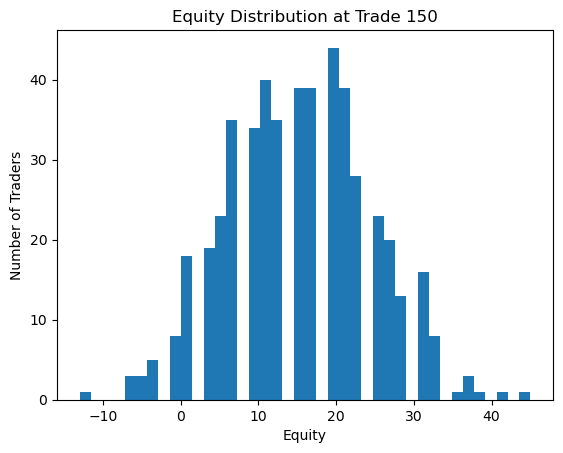

In [49]:
t = 150          # arbitrary snapshot
snapshot = equity[:, t]

plt.hist(snapshot, bins=40)
plt.title(f"Equity Distribution at Trade {t}")
plt.xlabel("Equity")
plt.ylabel("Number of Traders")
plt.show()

### Key insight:
#### *At a single timestamp, someone must be winning and someone must be losing — even with identical systems.*

## Rank Instability Over Time

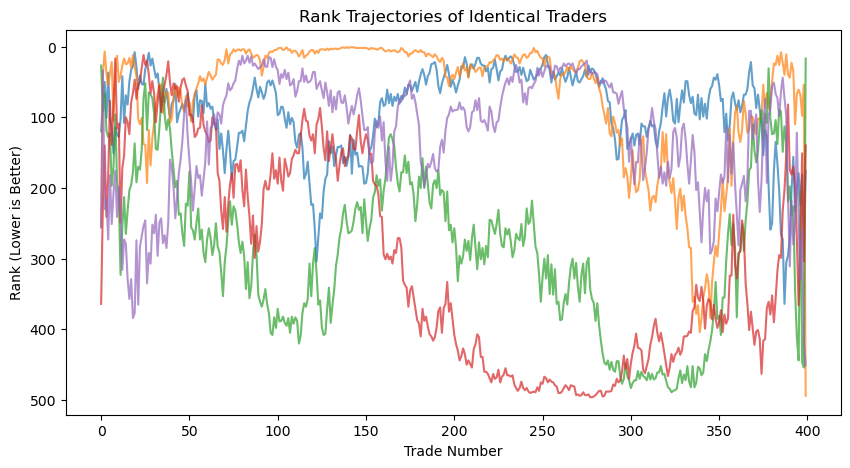

In [58]:
ranks = np.argsort(np.argsort(-equity, axis = 0), axis = 0)

sample_ids = np.random.choice(n_traders, size=5, replace=False)

plt.figure(figsize=(10, 5))
for i in sample_ids:
    plt.plot(ranks[i], alpha=0.7)

plt.gca().invert_yaxis()
plt.title("Rank Trajectories of Identical Traders")
plt.xlabel("Trade Number")
plt.ylabel("Rank (Lower is Better)")
plt.show()

## Top Performer Illusion

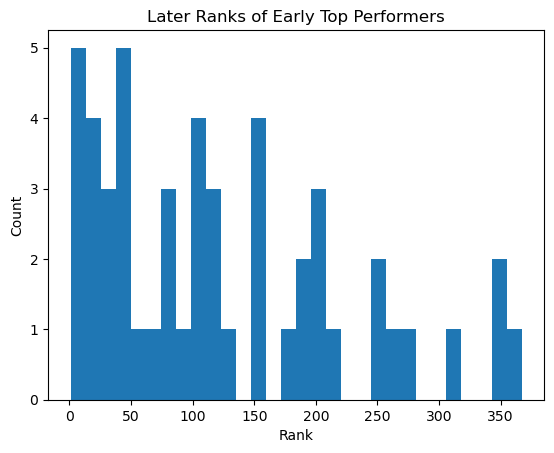

In [59]:
top_k = int(0.1 * n_traders)

top_now = np.argsort(-equity[:, t])[:top_k]

later_t = 300
later_ranks = ranks[top_now, later_t]


plt.hist(later_ranks, bins=30)
plt.title("Later Ranks of Early Top Performers")
plt.xlabel("Rank")
plt.ylabel("Count")
plt.show()


# Observations
- Large performance differences appear naturally among identical traders.
- Relative rank at a fixed time is unstable and frequently reshuffled.
- Early leaders often regress toward the population over time.
- Short-term outperformance does not persist reliably in a fair system.
- Pairwise dominance frequently reverses, even when one trader appears “ahead” for long periods.
- These effects arise without any differences in decision-making quality.

## Interpretation:
Relative performance reflects path variance more than skill. Social comparison extracts signal from noise and assigns meaning where none exists.